In [28]:
### Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Read in data and delete ID column 
df = pd.read_csv("train.csv")
df.drop(["ID"],axis = 1,inplace = True)
#df.drop("indus",axis = 1,inplace = True)


In [3]:
# Remove Target variable
y = df.pop("medv").values

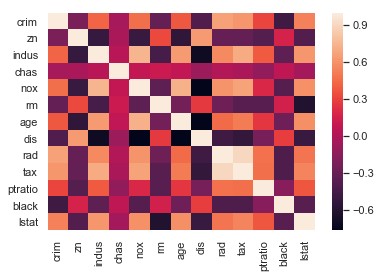

In [4]:
# Correlation Matrix
sns.heatmap(df.corr(),xticklabels=True,yticklabels=True)

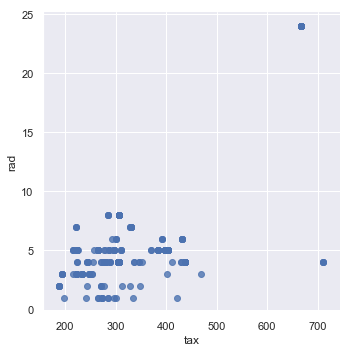

In [5]:
# Scatter Plot of highly correllated predictors 
sns.lmplot(data=df,x="tax",y="rad",fit_reg=False)

In [4]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
df, y, train_size=0.85)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [45]:
#Returns error values for learning curve
def learningCurve(X, y, Xval, yval,reg):
    
    (m,n) = X.shape

    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    
    for i in range(1,m+1):
        reg.fit(X[0:i, :],y[0:i])
        y_train_pred = reg.predict(X[0:i, :])
        error_train[i-1] = sqrt(mean_squared_error(y[0:i], y_train_pred))
        y_test_pred = reg.predict(Xval)
        error_val[i-1] = sqrt(mean_squared_error(yval, y_test_pred))
        
    return (error_train,error_val)

In [47]:
#Initialize X and y as matrix

reg = linear_model.LinearRegression()
X = X_train.values.copy()
m = X.shape[0]
X_train_conat  = np.concatenate((np.ones((m,1)),X),axis = 1)
X_test_matrix = X_test.values.copy()
y_train_matrix = np.matrix(y_train).T
y_test_matrix = np.matrix(y_test).T
X_test_concat = np.concatenate((np.ones((X_test_matrix.shape[0],1)),X_test_matrix),axis = 1)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:928: RuntimeWarning: invalid value encountered in true_divide
  return (c / G_diag) ** 2, c


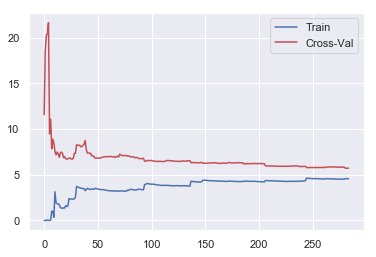

In [48]:
#Plot learning curves
(error_train, error_val) = learningCurve(X_train_conat, y_train_matrix, X_test_concat, y_test_matrix,reg)

m = error_train.shape[0]
x = np.linspace(0,m,m)
plt.plot(x, error_train, 'b') # plotting t, a separately 
plt.plot(x, error_val, 'r') # plotting t, b separately
plt.legend(["Train","Cross-Val"])
plt.show()


In [49]:
#Print final error_rates
print(error_train[-1])
print(error_val[-1])

[4.55481102]
[5.71199673]
